In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from scipy.io import loadmat
from sklearn.model_selection import StratifiedKFold

In [2]:
dataBaseline = loadmat(r"/Users/leonardominski/Documents/Projetos Python/Pesquisa/data/Dados_PonteFerroviaria/Dados12-06_Baseline.mat")
dataCincoP = loadmat(r"/Users/leonardominski/Documents/Projetos Python/Pesquisa/data/Dados_PonteFerroviaria/Dados12-06_CincoP.mat")
dataCinquenta = loadmat(r"/Users/leonardominski/Documents/Projetos Python/Pesquisa/data/Dados_PonteFerroviaria/Dados12-06_CinquentaP.mat")
dataDez = loadmat(r"/Users/leonardominski/Documents/Projetos Python/Pesquisa/data/Dados_PonteFerroviaria/Dados12-06_DezP.mat")
dataVinte = loadmat(r"/Users/leonardominski/Documents/Projetos Python/Pesquisa/data/Dados_PonteFerroviaria/Dados12-06_VinteP.mat")

In [3]:
dataBaseline = dataBaseline['Baseline']
dataCincoP = dataCincoP['CincoP']
dataCinquenta = dataCinquenta['CinquentaP']
dataDez = dataDez['DezP']
dataVinte = dataVinte['VinteP']

dadosRigidez = pd.DataFrame()

# Adicionar dataBaseline com coluna y_Baseline
dataBaseline_df = pd.DataFrame(dataBaseline)
dataBaseline_df['y_Baseline'] = 1
dadosRigidez = pd.concat([dadosRigidez, dataBaseline_df], ignore_index=True)

# Adicionar dataCinquenta com coluna y_CinquentaP
dataCinquenta_df = pd.DataFrame(dataCinquenta)
dataCinquenta_df['y_CinquentaP'] = 1
dadosRigidez = pd.concat([dadosRigidez, dataCinquenta_df], ignore_index=True)

# Adicionar dataVinte com coluna y_VinteP
dataVinte_df = pd.DataFrame(dataVinte)
dataVinte_df['y_VinteP'] = 1
dadosRigidez = pd.concat([dadosRigidez, dataVinte_df], ignore_index=True)

# Adicionar dataDez com coluna y_DezP
dataDez_df = pd.DataFrame(dataDez)
dataDez_df['y_DezP'] = 1
dadosRigidez = pd.concat([dadosRigidez, dataDez_df], ignore_index=True)

# Adicionar dataCincoP com coluna y_CincoP
dataCincoP_df = pd.DataFrame(dataCincoP)
dataCincoP_df['y_CincoP'] = 1
dadosRigidez = pd.concat([dadosRigidez, dataCincoP_df], ignore_index=True)

In [4]:
dadosRigidez = dadosRigidez.fillna(0)

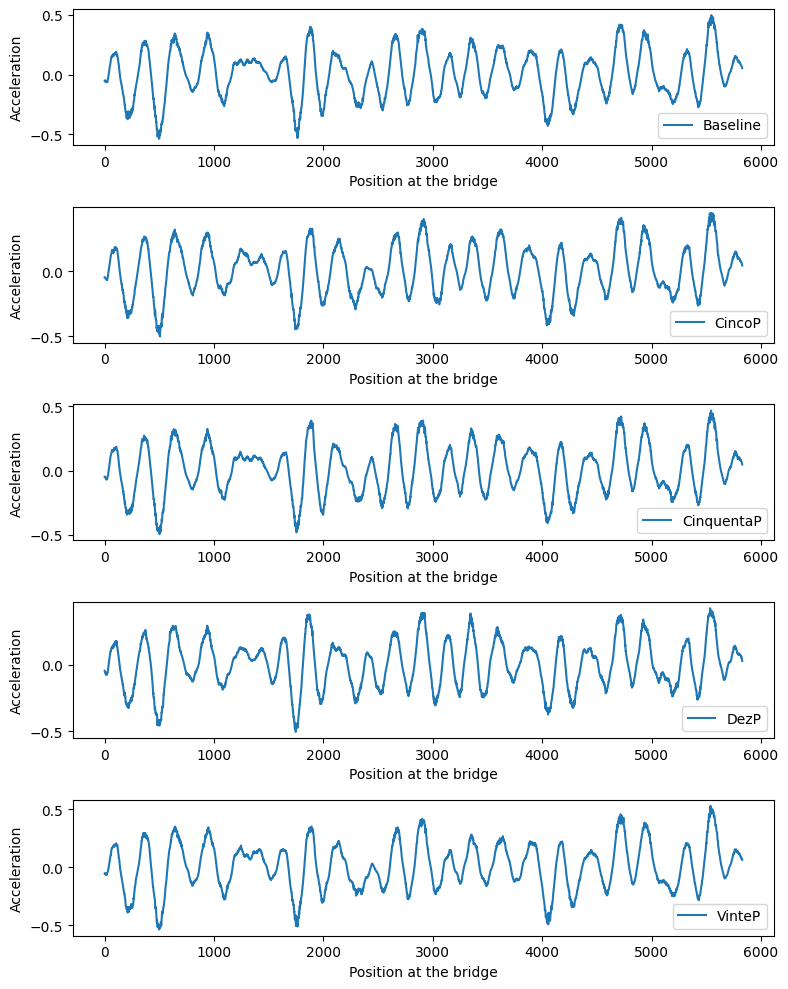

In [5]:
import matplotlib.pyplot as plt

exemplo_baseline = dadosRigidez.loc[250:250].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)
exemplo_cinco = dadosRigidez.loc[750:750].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)
exemplo_cinquenta = dadosRigidez.loc[1250:1250].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)
exemplo_dez = dadosRigidez.loc[1750:1750].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)
exemplo_vinte = dadosRigidez.loc[2250:2250].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)

x = range(5830)  # Eixo x de 0 a 5830

fig, axs = plt.subplots(5, 1, figsize=(8, 10))  # Criação dos subplots

# Plotagem do exemplo_baseline
axs[0].plot(x, exemplo_baseline.values.flatten(), label='Baseline')
axs[0].set_xlabel('Position at the bridge')
axs[0].set_ylabel('Acceleration')
axs[0].legend()

# Plotagem do exemplo_cinquenta
axs[1].plot(x, exemplo_cinco.values.flatten(), label='CincoP')
axs[1].set_xlabel('Position at the bridge')
axs[1].set_ylabel('Acceleration')
axs[1].legend()

# Plotagem do exemplo_vinte
axs[2].plot(x, exemplo_cinquenta.values.flatten(), label='CinquentaP')
axs[2].set_xlabel('Position at the bridge')
axs[2].set_ylabel('Acceleration')
axs[2].legend()

axs[3].plot(x, exemplo_dez.values.flatten(), label='DezP')
axs[3].set_xlabel('Position at the bridge')
axs[3].set_ylabel('Acceleration')
axs[3].legend()

axs[4].plot(x, exemplo_vinte.values.flatten(), label='VinteP')
axs[4].set_xlabel('Position at the bridge')
axs[4].set_ylabel('Acceleration')
axs[4].legend()

plt.tight_layout()
plt.show()


In [6]:
x = dadosRigidez.drop(['y_Baseline', 'y_CinquentaP', 'y_VinteP','y_DezP','y_CincoP'], axis = 1)
y = pd.DataFrame().assign(Baseline=dadosRigidez['y_Baseline'], Cinquenta = dadosRigidez['y_CinquentaP'], Vinte = dadosRigidez['y_VinteP'], Dez = dadosRigidez['y_DezP'], Cinco = dadosRigidez['y_CincoP']).values

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

Kclassif = KNeighborsClassifier(n_neighbors=5)
Kclassif.fit(x_train, y_train)

n_testes = 5
scores = cross_val_score(Kclassif, x_train, y_train, cv=n_testes)

for i in range(n_testes):
    print(f"Score for fold {i+1}: {scores[i]}")

avg_score = scores.mean()
print(f"Average score: {round(avg_score*100, 2)}%")


Score for fold 1: 0.8775
Score for fold 2: 0.865
Score for fold 3: 0.8825
Score for fold 4: 0.88
Score for fold 5: 0.8775
Average score: 87.65%


In [9]:
from sklearn.tree import DecisionTreeClassifier

Dec = DecisionTreeClassifier().fit(x_train, y_train)

n_testes = 5
scores = cross_val_score(Dec, x_train, y_train, cv=n_testes)

for i in range(n_testes):
    print(f"Score for fold {i+1}: {scores[i]}")

avg_score = scores.mean()
print(f"Average score: {round(avg_score*100, 2)}% Correto!")

Score for fold 1: 0.8425
Score for fold 2: 0.82
Score for fold 3: 0.82
Score for fold 4: 0.8225
Score for fold 5: 0.84
Average score: 82.9% Correto!


In [10]:
from sklearn.neighbors import KNeighborsClassifier

Kclassif = KNeighborsClassifier(n_neighbors=5)
Kclassif.fit(x_train, y_train)

print(f'The score for the train data is: {Kclassif.score(x_train,y_train)}')
print(f'The score for the test data is: {Kclassif.score(x_test,y_test)}')
print(f'Average precision:{round((Kclassif.score(x_train,y_train)+Kclassif.score(x_test,y_test))*100/2, 2)}% Errado! ')

n_testes = 5
scores = cross_val_score(Kclassif, x_train, y_train, cv=n_testes)

for i in range(n_testes):
    print(f"Score for fold {i+1}: {scores[i]}")

avg_score = scores.mean()
print(f"Average score: {round(avg_score*100, 2)}% Correto!")

The score for the train data is: 0.9355
The score for the test data is: 0.88
Average precision:90.78% Errado! 
Score for fold 1: 0.8775
Score for fold 2: 0.865
Score for fold 3: 0.8825
Score for fold 4: 0.88
Score for fold 5: 0.8775
Average score: 87.65% Correto!


In [11]:

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=(5830, 1)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
]) 


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5828, 32)          128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2914, 32)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 2912, 64)          6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1456, 64)         0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 93184)             0         
                                                                 
 dense (Dense)               (None, 64)                5

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.2 ,random_state=42)

In [14]:
history = model.fit(x_train, y_train, epochs=35, batch_size=50, validation_data=(x_val, y_val))

Epoch 1/35


2023-07-10 15:53:26.125081: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 3s 72ms/step - loss: 1.6219 - accuracy: 0.2269 - val_loss: 1.5954 - val_accuracy: 0.2775
Epoch 2/35
32/32 [==============================] - 2s 69ms/step - loss: 1.5207 - accuracy: 0.3400 - val_loss: 1.4280 - val_accuracy: 0.3275
Epoch 3/35
32/32 [==============================] - 2s 68ms/step - loss: 1.3016 - accuracy: 0.4225 - val_loss: 1.2210 - val_accuracy: 0.3825
Epoch 4/35
32/32 [==============================] - 2s 68ms/step - loss: 1.1171 - accuracy: 0.5119 - val_loss: 1.0753 - val_accuracy: 0.5750
Epoch 5/35
32/32 [==============================] - 2s 68ms/step - loss: 0.9967 - accuracy: 0.5550 - val_loss: 1.0005 - val_accuracy: 0.5000
Epoch 6/35
32/32 [==============================] - 2s 68ms/step - loss: 0.9082 - accuracy: 0.5875 - val_loss: 1.0155 - val_accuracy: 0.4975
Epoch 7/35
32/32 [==============================] - 2s 70ms/step - loss: 0.8678 - accuracy: 0.6237 - val_loss: 0.8851 - val_accuracy: 0.6025
Epoch 8/35
32/32 [======

16/16 [==============================] - 0s 11ms/step

Accuracy: 0.9540



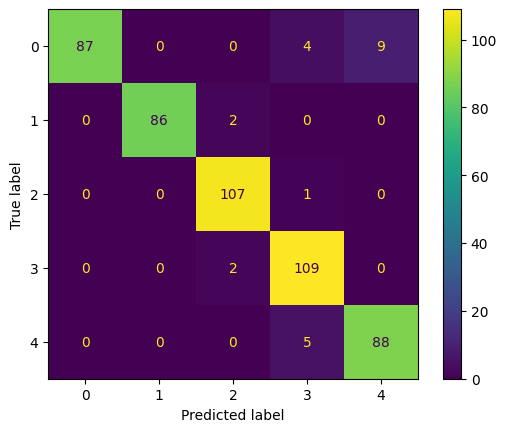

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

ytestpred = model.predict(x_test)
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test.argmax(axis=1), ytestpred.argmax(axis=1))))

#Your input to confusion_matrix must be an array of int not one hot encodings.
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), ytestpred.argmax(axis=1))

16/16 [==============================] - 0s 13ms/step


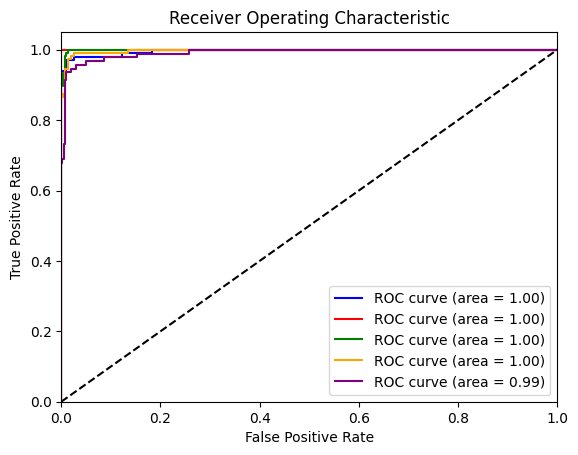

In [16]:
from sklearn.metrics import roc_curve, auc

# Obter as probabilidades previstas do modelo
y_pred_prob = model.predict(x_test)

# Calcular a curva ROC para cada classe
fpr = {} # Taxas de falso positivo (FPR)
tpr = {} # Verdadeiro positivo (TPR)
roc_auc = {} # Área sob a curva ROC (AUC)
num_classes = 5 #Número de classes (Baseline, Cinquenta, Vinte, Dez, Cinco)

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar as curvas ROC
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adicione mais cores, se necessário

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [17]:
lista = []
n = 4000
for i in range(1829):
    lista.append(n)
    n += 1

for i in range(4001, 5830):
    dadosRigidez.drop(i, axis=1, inplace=True)

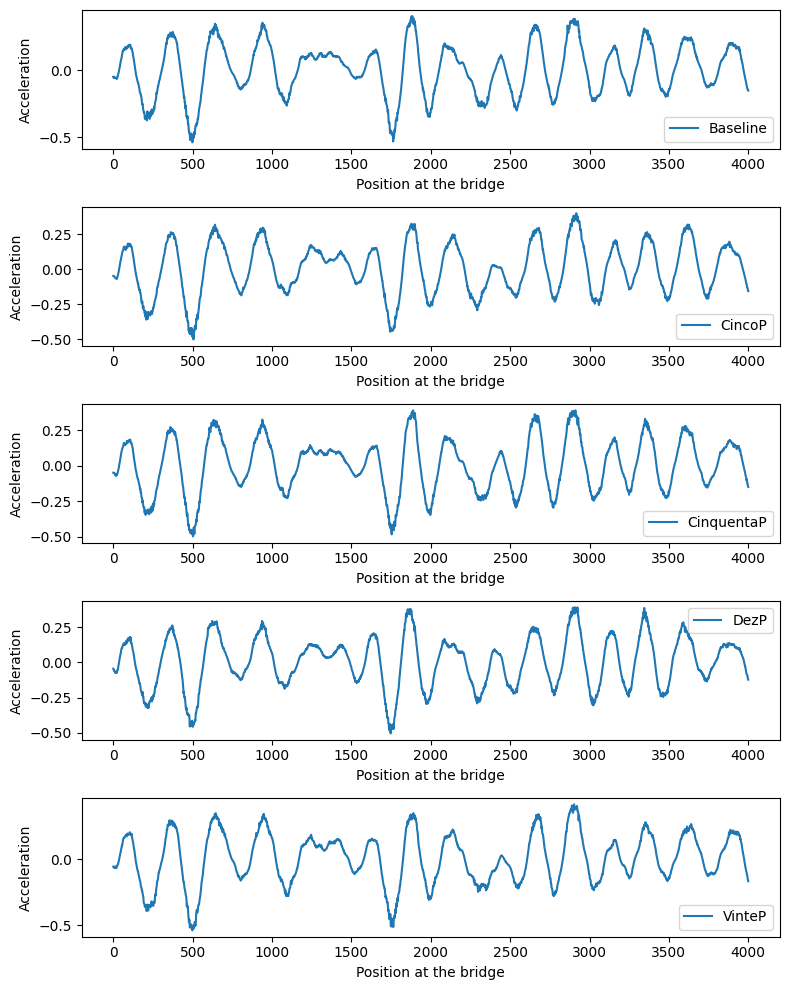

In [18]:
import matplotlib.pyplot as plt

exemplo_baseline = dadosRigidez.loc[250:250].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)
exemplo_cinco = dadosRigidez.loc[750:750].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)
exemplo_cinquenta = dadosRigidez.loc[1250:1250].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)
exemplo_dez = dadosRigidez.loc[1750:1750].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)
exemplo_vinte = dadosRigidez.loc[2250:2250].drop(['y_Baseline', 'y_CincoP', 'y_CinquentaP','y_DezP','y_VinteP'], axis=1)

x = range(4001)  # Eixo x de 0 a 4000

fig, axs = plt.subplots(5, 1, figsize=(8, 10))  # Criação dos subplots

# Plotagem do exemplo_baseline
axs[0].plot(x, exemplo_baseline.values.flatten(), label='Baseline')
axs[0].set_xlabel('Position at the bridge')
axs[0].set_ylabel('Acceleration')
axs[0].legend()

# Plotagem do exemplo_cinquenta
axs[1].plot(x, exemplo_cinco.values.flatten(), label='CincoP')
axs[1].set_xlabel('Position at the bridge')
axs[1].set_ylabel('Acceleration')
axs[1].legend()

# Plotagem do exemplo_vinte
axs[2].plot(x, exemplo_cinquenta.values.flatten(), label='CinquentaP')
axs[2].set_xlabel('Position at the bridge')
axs[2].set_ylabel('Acceleration')
axs[2].legend()

axs[3].plot(x, exemplo_dez.values.flatten(), label='DezP')
axs[3].set_xlabel('Position at the bridge')
axs[3].set_ylabel('Acceleration')
axs[3].legend()

axs[4].plot(x, exemplo_vinte.values.flatten(), label='VinteP')
axs[4].set_xlabel('Position at the bridge')
axs[4].set_ylabel('Acceleration')
axs[4].legend()

plt.tight_layout()
plt.show()


In [26]:
x = dadosRigidez.drop(['y_Baseline', 'y_CinquentaP', 'y_VinteP','y_DezP','y_CincoP'], axis = 1)
y = pd.DataFrame().assign(Baseline=dadosRigidez['y_Baseline'], Cinquenta = dadosRigidez['y_CinquentaP'], Vinte = dadosRigidez['y_VinteP'], Dez = dadosRigidez['y_DezP'], Cinco = dadosRigidez['y_CincoP'].values)


In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

Kclassif = KNeighborsClassifier(n_neighbors=5)
Kclassif.fit(x_train, y_train)

n_testes = 5
scores = cross_val_score(Kclassif, x_train, y_train, cv=n_testes)

for i in range(n_testes):
    print(f"Score for fold {i+1}: {scores[i]}")

avg_score = scores.mean()
print(f"Average score: {round(avg_score*100, 2)}%")


Score for fold 1: 0.8975
Score for fold 2: 0.87
Score for fold 3: 0.8925
Score for fold 4: 0.895
Score for fold 5: 0.89
Average score: 88.9%


In [29]:
from sklearn.tree import DecisionTreeClassifier

Dec = DecisionTreeClassifier().fit(x_train, y_train)
n_testes = 5
scores = cross_val_score(Dec, x_train, y_train, cv=n_testes)

for i in range(n_testes):
    print(f"Score for fold {i+1}: {scores[i]}")

avg_score = scores.mean()
print(f"Average score: {round(avg_score*100, 2)}% Correto!")

Score for fold 1: 0.8375
Score for fold 2: 0.8275
Score for fold 3: 0.81
Score for fold 4: 0.835
Score for fold 5: 0.8475
Average score: 83.15% Correto!


In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=(4001, 1)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
]) 


In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 3999, 32)          128       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1999, 32)         0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 1997, 64)          6208      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 998, 64)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 63872)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [32]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.2 ,random_state=42)

In [33]:
history = model.fit(x_train, y_train, epochs=35, batch_size=50, validation_data=(x_val, y_val))

Epoch 1/35
32/32 [==============================] - 2s 61ms/step - loss: 1.5728 - accuracy: 0.2894 - val_loss: 1.4664 - val_accuracy: 0.3250
Epoch 2/35
32/32 [==============================] - 2s 49ms/step - loss: 1.2877 - accuracy: 0.4269 - val_loss: 1.2088 - val_accuracy: 0.4700
Epoch 3/35
32/32 [==============================] - 1s 47ms/step - loss: 1.1203 - accuracy: 0.5050 - val_loss: 1.0849 - val_accuracy: 0.5775
Epoch 4/35
32/32 [==============================] - 1s 46ms/step - loss: 1.0087 - accuracy: 0.5725 - val_loss: 0.9954 - val_accuracy: 0.5650
Epoch 5/35
32/32 [==============================] - 1s 47ms/step - loss: 0.9542 - accuracy: 0.5806 - val_loss: 0.9359 - val_accuracy: 0.5525
Epoch 6/35
32/32 [==============================] - 1s 46ms/step - loss: 0.8278 - accuracy: 0.6694 - val_loss: 0.8688 - val_accuracy: 0.6000
Epoch 7/35
32/32 [==============================] - 1s 46ms/step - loss: 0.8164 - accuracy: 0.6313 - val_loss: 0.9961 - val_accuracy: 0.5475
Epoch 8/35
32

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

ytestpred = model.predict(x_test)
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test.argmax(axis=1), ytestpred.argmax(axis=1))))

#Your input to confusion_matrix must be an array of int not one hot encodings.
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), ytestpred.argmax(axis=1))

16/16 [==============================] - 0s 8ms/step


AttributeError: 'DataFrame' object has no attribute 'argmax'

16/16 [==============================] - 0s 11ms/step


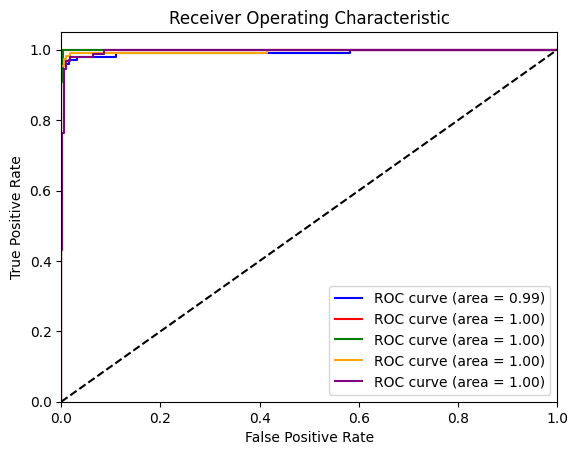

In [ ]:
from sklearn.metrics import roc_curve, auc

# Obter as probabilidades previstas do modelo
y_pred_prob = model.predict(x_test)

# Calcular a curva ROC para cada classe
fpr = {} # Taxas de falso positivo (FPR)
tpr = {} # Verdadeiro positivo (TPR)
roc_auc = {} # Área sob a curva ROC (AUC)
num_classes = 5 #Número de classes (Baseline, Cinquenta, Vinte, Dez, Cinco)

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar as curvas ROC
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adicione mais cores, se necessário

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
